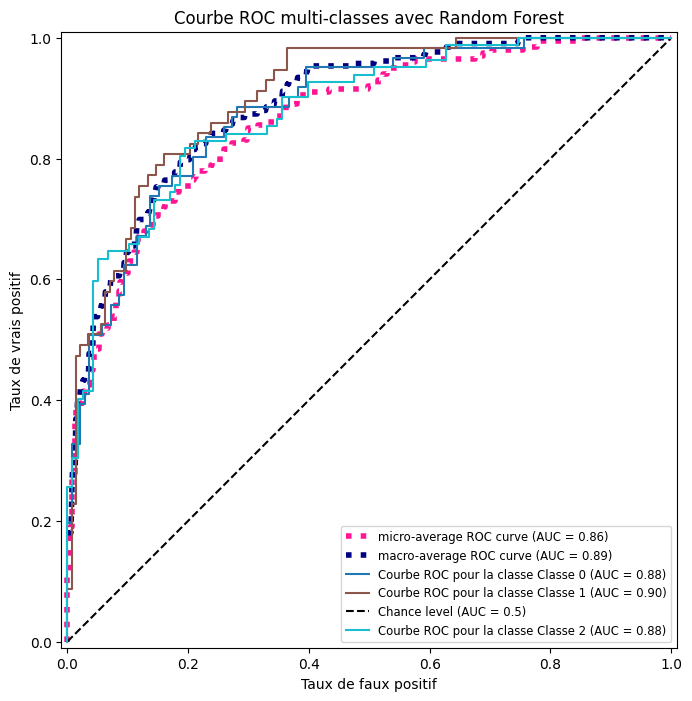

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import auc, roc_curve, RocCurveDisplay
from sklearn.datasets import make_classification


# Simulate some data
n_classes = 3
X, y = make_classification(n_samples=1000, n_features=20, n_classes=n_classes, n_informative=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a model
best_model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
best_model.fit(X_train, y_train)

# Compute ROC curve and ROC area for each class

target_names = [f"Classe {i}" for i in range(n_classes)]
 
label_binarizer = LabelBinarizer()
y_onehot_test = label_binarizer.fit_transform(y_test)
 
y_score = best_model.predict_proba(X_test)
 
n_classes = len(label_binarizer.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()
 
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
 
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
 
 
fpr_grid = np.linspace(0.0, 1.0, 1000)
mean_tpr = np.zeros_like(fpr_grid)
 
for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])
 
mean_tpr /= n_classes
 
fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
 
 
fig, ax = plt.subplots(figsize=(25, 8))
 
plt.plot(fpr["micro"], tpr["micro"], label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})", color="deeppink", linestyle=":", linewidth=4)
 
plt.plot(fpr["macro"], tpr["macro"], label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})", color="navy", linestyle=":", linewidth=4)
 
colors = cycle(plt.cm.tab10(np.linspace(0, 1, n_classes)))
for i, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(y_onehot_test[:, i], y_score[:, i], name=f"Courbe ROC pour la classe {target_names[i]}", color=color, ax=ax, plot_chance_level=(i == 1))
 
plt.legend(loc='best', fontsize='small')
plt.xlabel("Taux de faux positif")
plt.ylabel("Taux de vrais positif")
plt.title("Courbe ROC multi-classes avec Random Forest")
 
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import auc, roc_curve, RocCurveDisplay

In [7]:
def plot_roc_curve(y_true, y_score):

    n_classes = np.unique(y_true).shape[0]
    print(n_classes)

    label_binarizer = LabelBinarizer()
    y_onehot = label_binarizer.fit_transform(y_true)
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_onehot[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    fpr_grid = np.linspace(0.0, 1.0, 1000)
    mean_tpr = np.zeros_like(fpr_grid)

    for i in range(n_classes):
        mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])

    mean_tpr /= n_classes

    fpr["macro"] = fpr_grid
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    fig, ax = plt.subplots(figsize=(25, 8))

    plt.plot(fpr["micro"], tpr["micro"], label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})", color="deeppink", linestyle=":", linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"], label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})", color="navy", linestyle=":", linewidth=4)

    colors = cycle(plt.cm.tab10(np.linspace(0, 1, n_classes)))
    for i, color in zip(range(n_classes), colors):
        RocCurveDisplay.from_predictions(y_onehot[:, i], y_score[:, i], name=f"ROC curve for class {i}", color=color, ax=ax, plot_chance_level=(i == 1))

    plt.legend(loc='best', fontsize='small')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Multi-class ROC curve")
    plt.show()

In [8]:
# Example usage
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Simulate some data
n_classes = 3
X, y = make_classification(n_samples=1000, n_features=20, n_classes=n_classes, n_informative=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a model
best_model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
best_model.fit(X_train, y_train)

# Predict probabilities
y_score = best_model.predict_proba(X_test)

# Plot ROC curve
plot_roc_curve(y_test, y_score)


[0 1 2]


TypeError: only integer scalar arrays can be converted to a scalar index